# <center>Customer Segmentation and Personality Analysis 🛒</center>

<center><img src="https://images.unsplash.com/photo-1517245386807-bb43f82c33c4?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

# About the Dataset

<h4>People</h4>

* **ID**: Customer's unique identifier
* **Year_Birth**: Customer's birth year
* **Education**: Customer's education level
* **Marital_Status**: Customer's marital status
* **Income**: Customer's yearly household income
* **Kidhome**: Number of children in customer's household
* **Teenhome**: Number of teenagers in customer's household
* **Dt_Customer**: Date of customer's enrollment with the company
* **Recency**: Number of days since customer's last purchase
* **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

<h4>Products</h4>

* **MntWines**: Amount spent on wine in last 2 years
* **MntFruits**: Amount spent on fruits in last 2 years
* **MntMeatProducts**: Amount spent on meat in last 2 years
* **MntFishProducts**: Amount spent on fish in last 2 years
* **MntSweetProducts**: Amount spent on sweets in last 2 years
* **MntGoldProds**: Amount spent on gold in last 2 years

<h4>Promotion</h4>

* **NumDealsPurchases**: Number of purchases made with a discount
* **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

<h4>Place</h4>

* **NumWebPurchases**: Number of purchases made through the company’s website
* **NumCatalogPurchases**: Number of purchases made using a catalogue
* **NumStorePurchases**: Number of purchases made directly in stores
* **NumWebVisitsMonth**: Number of visits to company’s website in the last month

# Importing Essential Libraries, Metrics, Tools and Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(2240, 29)

***Learning the dtypes of columns' and how many non-null values there are in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


# Handling Missing Values and Duplicates

***As we can see, we have 24 missing values that we have to handle in the column "Income".***

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

***Visualizing the null spaces (missing values) in the dataset.***

<AxesSubplot:>

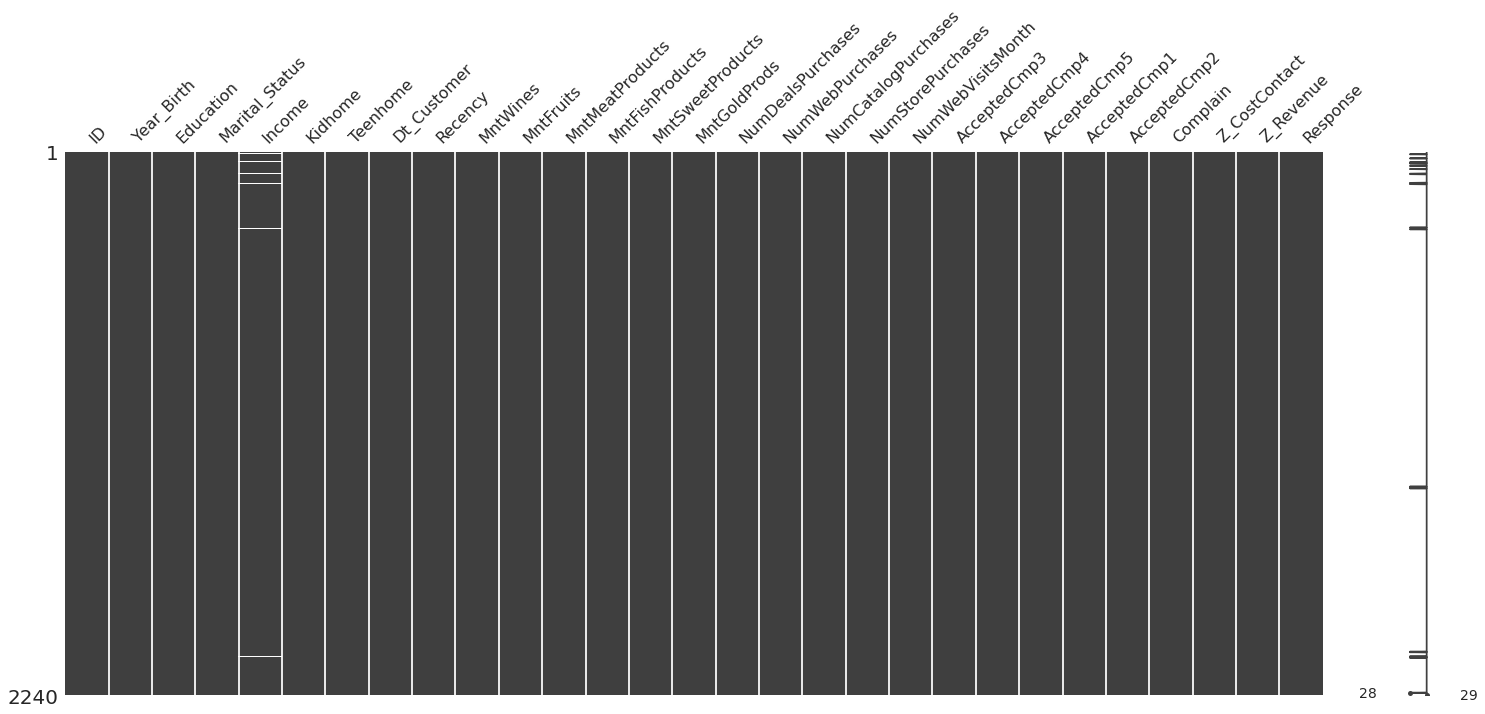

In [8]:
msno.matrix(df)

***We impute the missing values in column "Income" with the median of that particular column.***

In [9]:
df["Income"].fillna(df["Income"].median(), inplace=True)

***There is no duplicate, data seems clear so far.***

In [10]:
df.duplicated().sum()

0

# Feature Engineering

***Creating the "Age", "Money_Spent", "PurchaseNum", "Children" and "Marital_Status" out of existing columns.***

In [11]:
df["Age"] = 2022 - df["Year_Birth"]

df["Money_Spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Together", "Alone": "Single", "Absurd": "Single", "Divorced": "Single", "Widow": "Single", "Divorced": "Single", "YOLO": "Single"})

***Dropping redundant columns from dataset.***

In [12]:
df.drop(["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"], axis=1, inplace=True)

# Data Visualization

***Visualizing the correlation between the some of the important variables using pairplot visualization.***

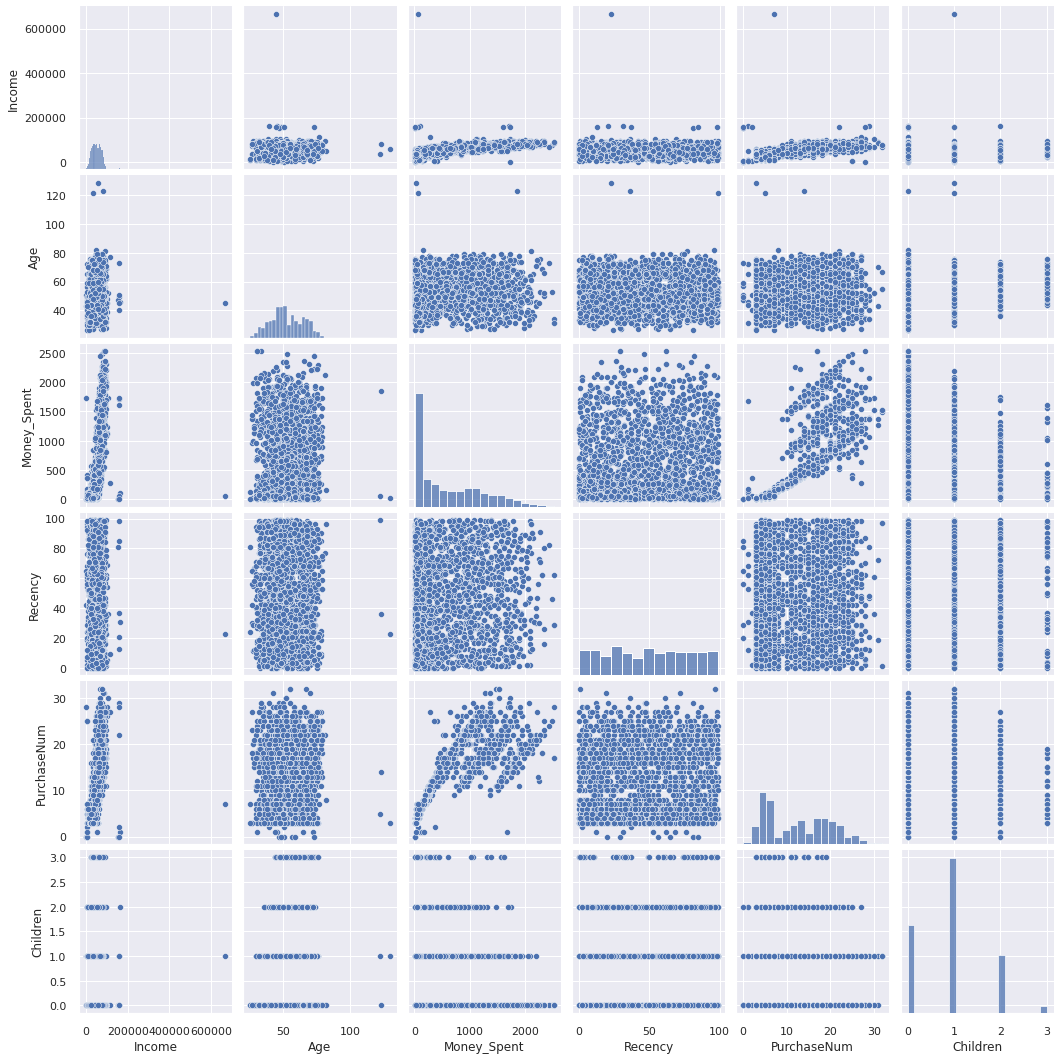

In [13]:
cols_to_plot = ["Income", "Age", "Money_Spent", "Recency", "PurchaseNum", "Children"]
sns.set_theme()

sns.pairplot(df[cols_to_plot])

<h3>Plotting the Distribution of Each Variable</h3>

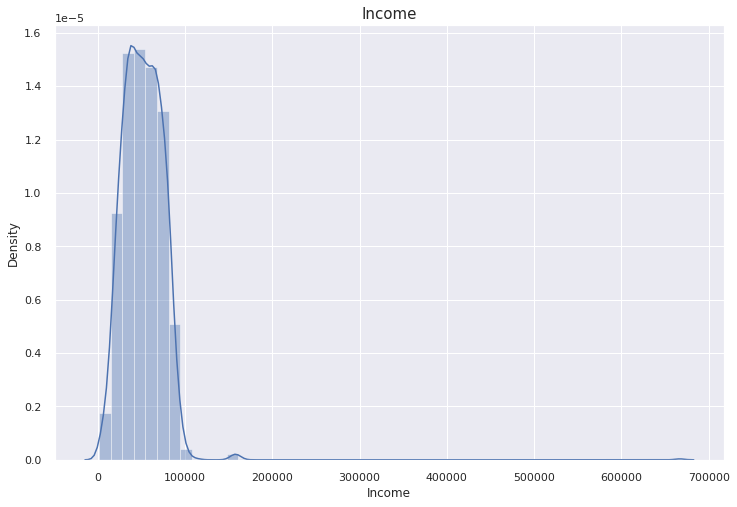

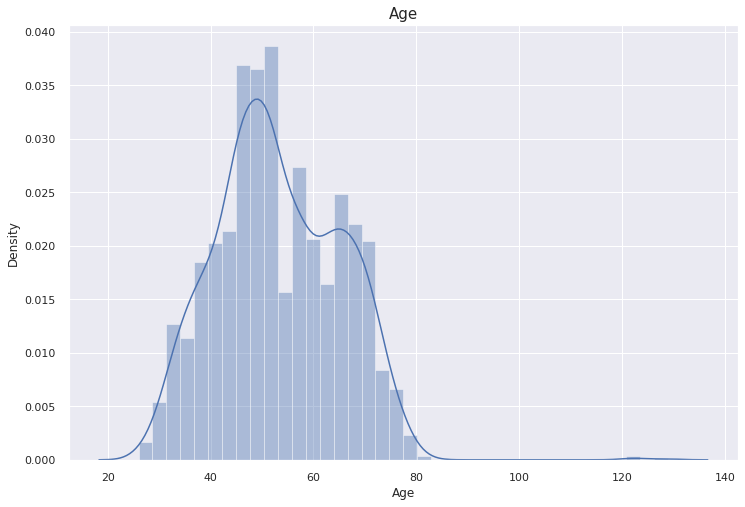

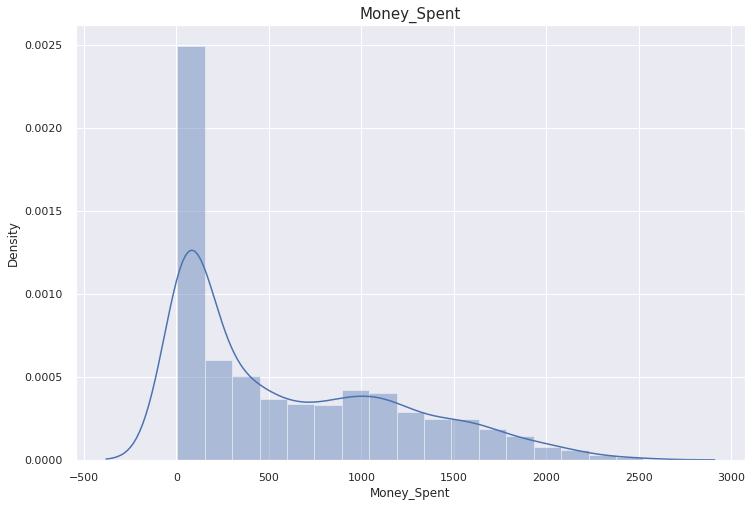

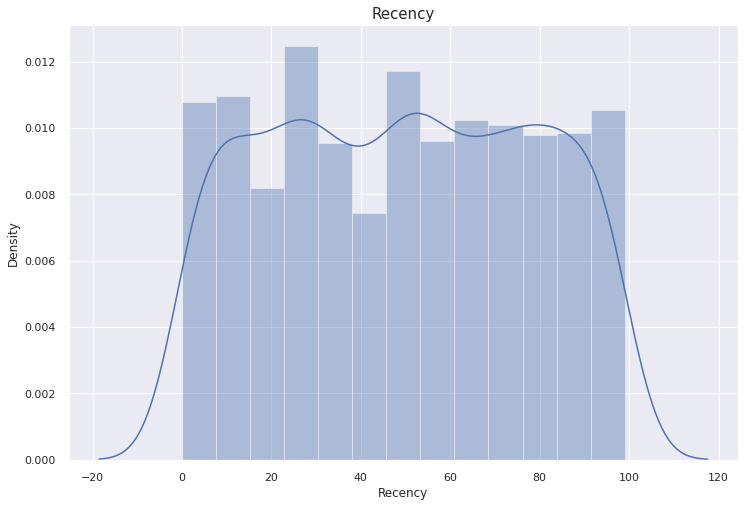

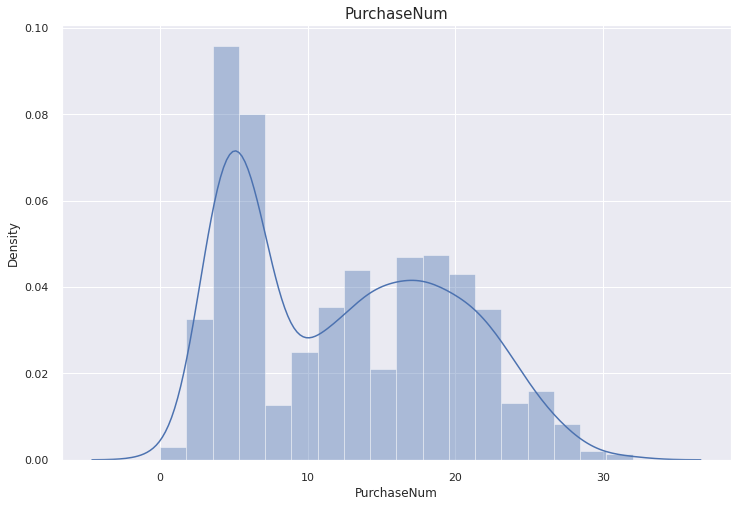

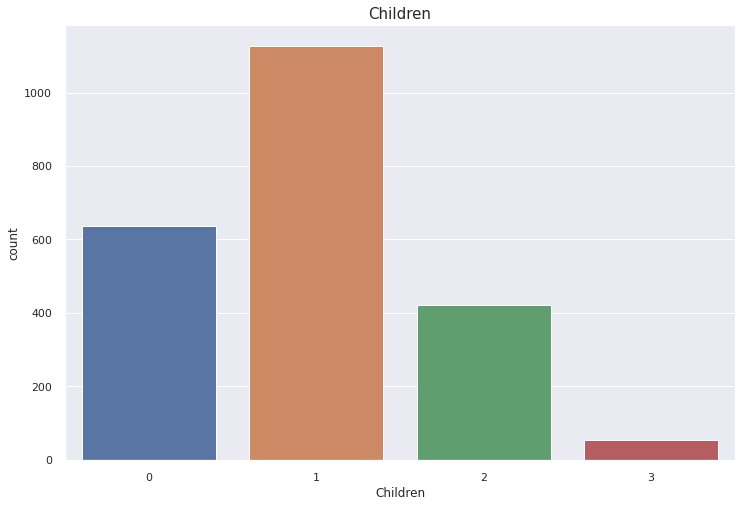

In [14]:
cols_to_plot.remove("Children")

for col in cols_to_plot:
    plt.figure(figsize=(12, 8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(df["Children"])
plt.title("Children", size=15)
plt.show()

***Visualizing the linear correlations between variables using Heatmap Visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

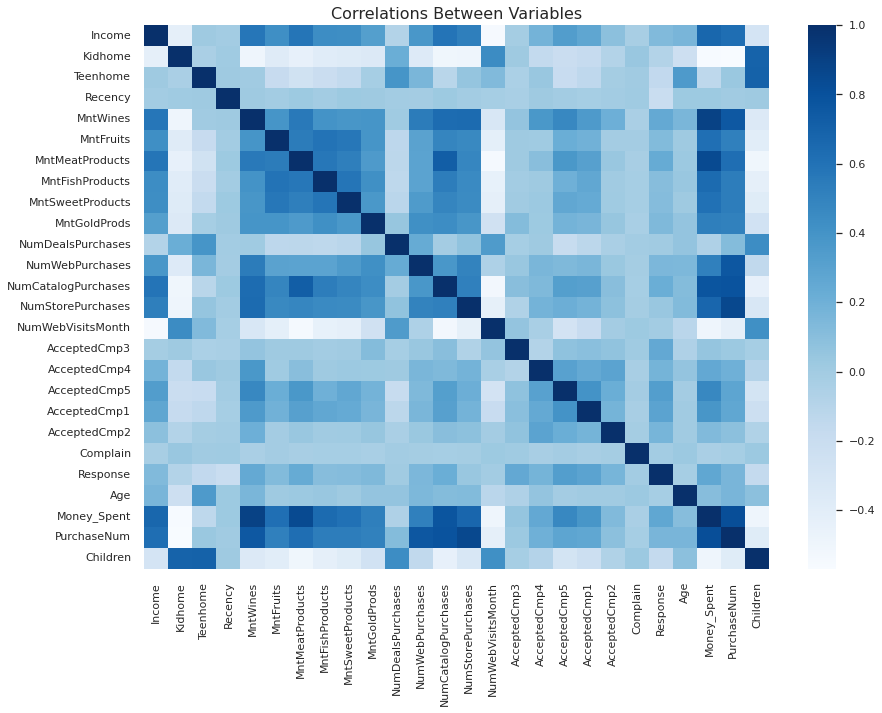

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# Data Preprocessing

<h3>One-Hot Encoding</h3>

In [16]:
X = df

cat_cols = X.select_dtypes(["object"]).columns
X = pd.get_dummies(X, columns=cat_cols)

<h3>Data Standardization</h3>

In [17]:
num_cols = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Money_Spent", "PurchaseNum", "Age"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Principal Component Analysis

Principal Component Analysis is an unsupervised statistical technique used for Dimensionality Reduction. It combines the correlated features, creates the same number of features which are uncorrelated to one another and compresses most of the information (variance) into the first components. Hence, it helps us to handle the Multicollinearity which affects the ML models in a bad way.

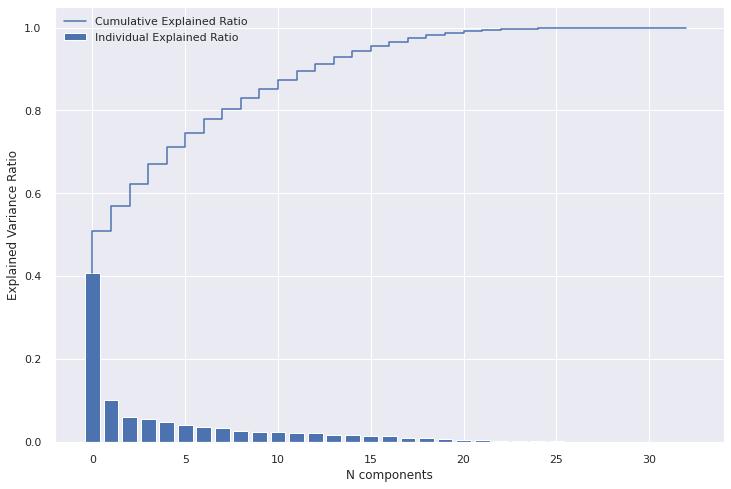

In [18]:
pca = PCA()
pca.fit(X)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

***It would be a nice practice here to select and visulize the first 3 components even though they have slightly more than half of the information.***

In [19]:
pca = PCA(n_components = 3)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3"])

# Clustering

***As for the cluster number, we should choose the number of clusters where the elbow is breaking most. But, we may not always be able to see that clearly so we just make use of KElbowVisualizer.***

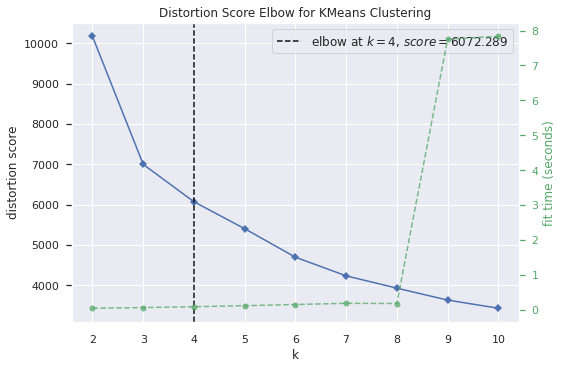

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

***It can be easily seen that the optimal value for "n_clusters" parameter is 4. Afterwards, we get to the part of clustering.***

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)

<h3>Plotting the Clusters Using 3 Dimensions</h3>

In [22]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

***Total explained variance for the first 3 components is 57.01%. So, I opt to select the first 7 components because they approximately 75% of the information present in data.***

In [23]:
pca = PCA(n_components = 7)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

In [24]:
total_var = pca.explained_variance_ratio_.sum() * 100
print("Explained Total Variance:",total_var)

Explained Total Variance: 74.59442405500945


***Here, we use the KElbowVisualizer for 7-dimensional data. It looks like we should keep selecting 4 clusters.***

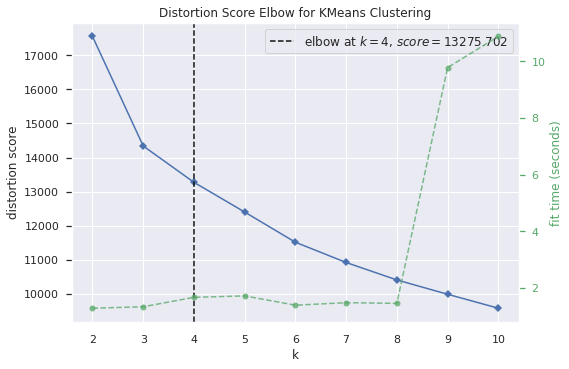

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(X_pca)
elbow_graph.show()

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_pca)

df["Clusters"] = predictions

# Customer Personality Analysis

In [27]:
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

cluster0_num = df[df["Clusters"]==0].shape[0]
cluster1_num = df[df["Clusters"]==1].shape[0]
cluster2_num = df[df["Clusters"]==2].shape[0]
cluster3_num = df[df["Clusters"]==3].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

**Observations:**

* Cluster 1 makes up the huge part of data
* Cluster that takes up the least space is Cluster 3

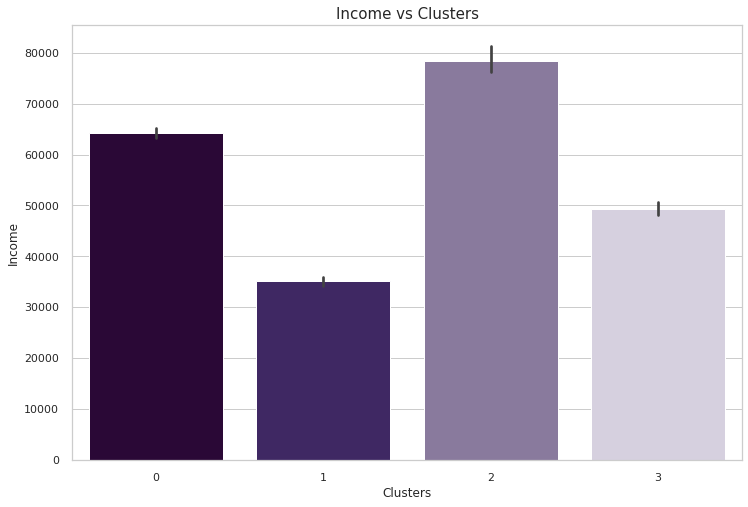

In [28]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"], palette=pal)
plt.title("Income vs Clusters", size=15)
plt.show()

**Observations:**

* The cluster which has the highest income is Cluster 2
* Income of Cluster 1 is relatively lower than incomes of other clusters

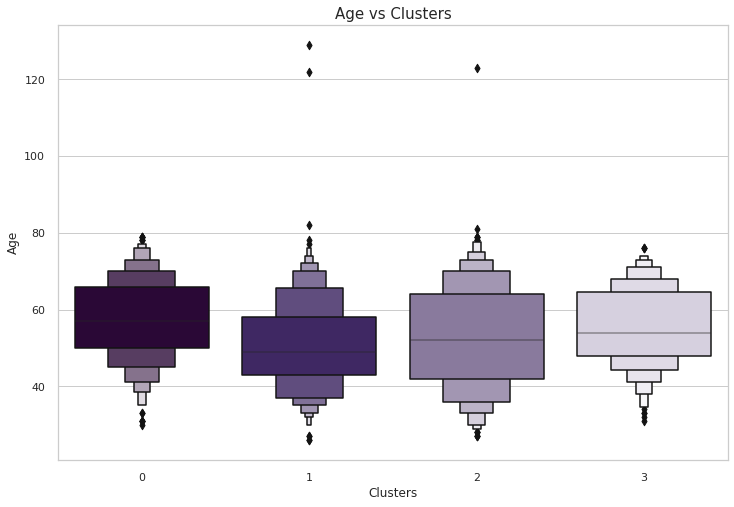

In [29]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Age"], palette=pal)
plt.title("Age vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 1 includes mostly youngest people (42-58 with the median around 48)
* The oldest cluster is Cluster 0 (51-66)
* Cluster 2 mainly includes middle-aged customers (41-65 with the median around 52)

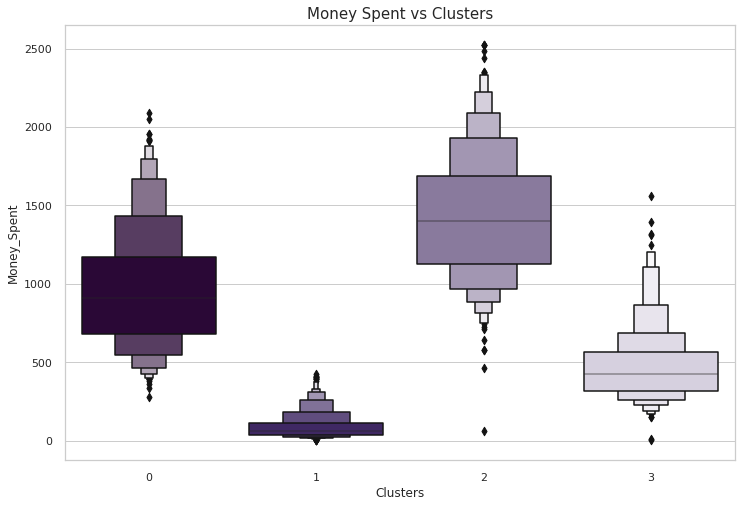

In [30]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["Money_Spent"], palette=pal)
plt.title("Money Spent vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 1 is spending the least money
* Cluster 2 is the cluster that spends the most money among other clusters

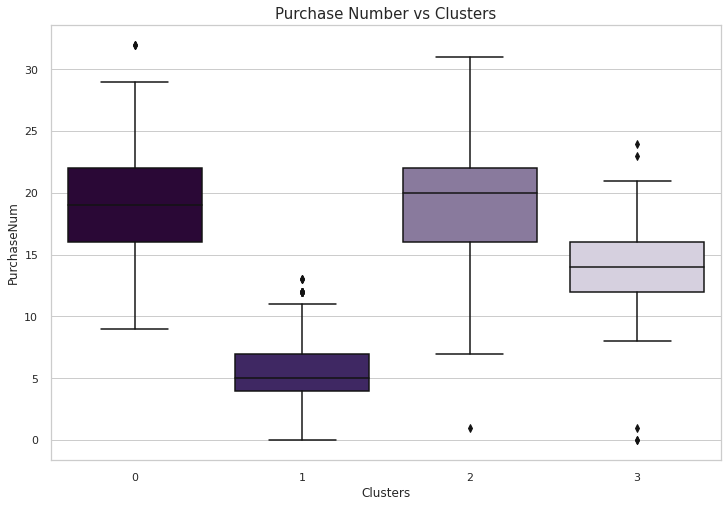

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["PurchaseNum"], palette=pal)
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 2 has the highest purchase number
* Cluster 1 does the least shopping

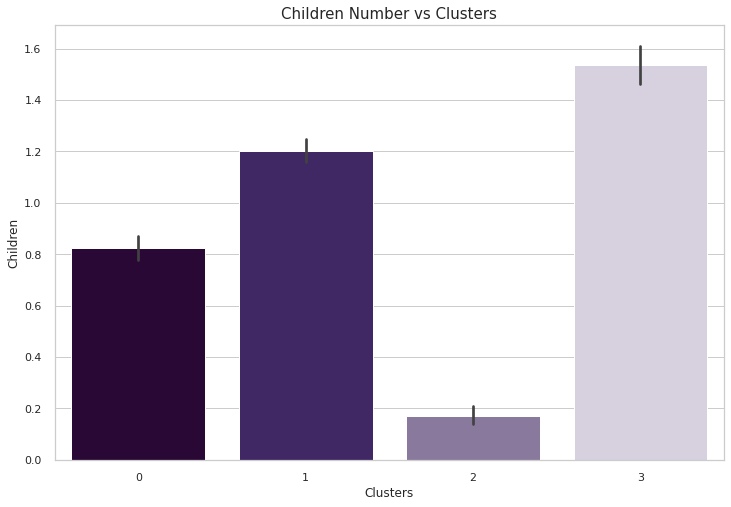

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Children"], palette=pal)
plt.title("Children Number vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 2 has nearly no child
* Cluster 3 has the most children among other clusters

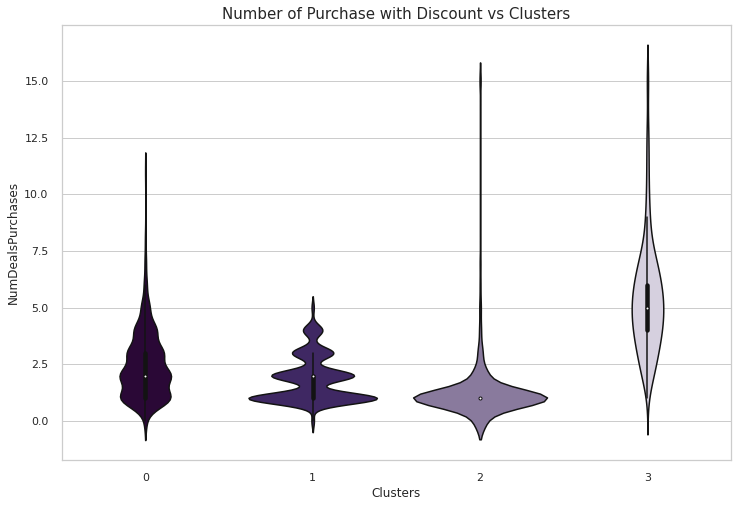

In [33]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette=pal)
plt.title("Number of Purchase with Discount vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 2 benefits least from the discounts
* Cluster 3 has the highest number of purchase with discount

# Conclusion

**Cluster 0:**
* Is the oldest cluster

**Cluster 1:**
* Is the youngest cluster
* Is least-earner
* Has a tendecy to spend less money
* Has least purchase number (shop-hater)

**Cluster 2:**
* Has the highest income
* Spends the most money
* Has the highest purchase number (shop-lover)
* Has the least number of children
* Is the one that benefits least from discounts

**Cluster 3:**
* Has most children
* Is the cluster that shops most when there is a discount

# Marketing Suggestions

* **Cluster 1** makes the least money and spends least money. So, you should gather the information about the its location and increase the discount rates at shops located at those locations. Also, this is the youngest cluster and that's why the shops situated at those locations should include the goods, clothes etc. **suitable** for the young people.

* **Cluster 3** is the second oldest cluster and people in that cluster have highest children number. It can also be observed that they spend the least money. Meaning that you need to consider discounting. In addition to that, if you make the discounts with a slogan like "*Make Your Child Happy*" in shops at those locations where these people live, because it could remind them that they are parents, it would possibly increase the number of sales.

<h2 style="font-family: Times New Roman;">Thank you so much for reading the notebook. Preparing notebooks is taking a great deal of time. If you liked it, please do not forget to give an upvote. Peace Out ✌️ ...</h2>